In [9]:
# open wordnet_to_labels_txt file

with open('imagenet1000_clsidx_to_labels.txt','r') as f:
    wordnet_to_labels_dict = eval(f.read())

In [10]:
wordnet_to_labels_dict[370]

'guenon, guenon monkey'

In [11]:
# open csv folder
import csv

CSV_FOLDER = "../result"

# real_label
with open(f"{CSV_FOLDER}/real_label.csv") as f:
    real_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
#         if value[0] == "9999":
#             continue
        real_label_dict[key] = value

# gmlp
with open(f"{CSV_FOLDER}/gmlp.csv") as f:
    gmlp_predict_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
        gmlp_predict_label_dict[key] = value

# efficent
with open(f"{CSV_FOLDER}/efficientnet_b3.csv") as f:
    efficientnet_predict_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
        efficientnet_predict_label_dict[key] = value


In [12]:
print(real_label_dict["ILSVRC2012_val_00000002.JPEG"])
print(gmlp_predict_label_dict["ILSVRC2012_val_00000001.JPEG"])
print(efficientnet_predict_label_dict["ILSVRC2012_val_00000001.JPEG"])

['970', '795']
['65', '58', '60', '53', '390']
['65', '58', '54', '63', '67']


In [104]:
i = 1
validation_file_sum = 50001

In [58]:
# 英語のラベルを日本語に変換する
def translation_en_to_ja(text):
    from googletrans import Translator
    tr = Translator()
    return tr.translate(text=text, src="en", dest="ja").text 

['9999']


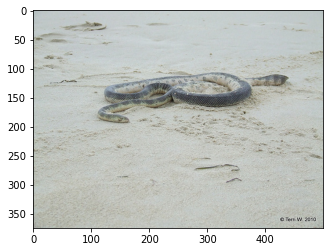

In [106]:
# 画像を表示
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if i < validation_file_sum:
    image_file_name = f"ILSVRC2012_val_{str(i).zfill(8)}.JPEG"
    real_label = real_label_dict[image_file_name]
    print(real_label)
    plt.imshow(mpimg.imread(f"../imagenet/validation/{image_file_name}"),cmap="gray")
    if real_label[0] != "9999":
       plt.title(f"real:{wordnet_to_labels_dict[int(real_label[0])]}", loc='left', y=1)
    i += 1

In [15]:
# gmlpがtop-1で正しく予測したもののリストを取得する
# ただし，real_labelはラベル数がひとつのもののみ扱う
gmlp_predict_correct_list = []
gmlp_predict_incorrect_list = []
for i in range(1,50001):
    image_file_name = f"ILSVRC2012_val_{str(i).zfill(8)}.JPEG"
    if len(real_label_dict[image_file_name]) > 1:
        continue
    if int(real_label_dict[image_file_name][0]) == 9999:
        continue
    gmlp_predict_top1 = int(gmlp_predict_label_dict[image_file_name][0])
    real_label_only_one = int(real_label_dict[image_file_name][0])
    if gmlp_predict_top1 == real_label_only_one:
        gmlp_predict_correct_list.append(i)
    else:
        gmlp_predict_incorrect_list.append(i)

In [16]:
len(gmlp_predict_incorrect_list)

5038

In [17]:
# 同様にefficentnetがtop-1で正しく予測したもののリストを取得する
efficientnet_predict_correct_list = []
efficientnet_predict_incorrect_list = []
for i in range(1,50001):
    image_file_name = f"ILSVRC2012_val_{str(i).zfill(8)}.JPEG"
    if len(real_label_dict[image_file_name]) > 1:
        continue
    if int(real_label_dict[image_file_name][0]) == 9999:
        continue
    efficientnet_predict_top1 = int(efficientnet_predict_label_dict[image_file_name][0])
    real_label_only_one = int(real_label_dict[image_file_name][0])
    if efficientnet_predict_top1 == real_label_only_one:
        efficientnet_predict_correct_list.append(i)
    else:
        efficientnet_predict_incorrect_list.append(i)

In [18]:
len(efficientnet_predict_incorrect_list)

4492

In [19]:
# gmlpが正解でefficientnetが不正解のリストを取得する
gmlp_predict_correct_set = set(gmlp_predict_correct_list)
efficient_predict_incorrect_set = set(efficientnet_predict_incorrect_list)
gmlp_correct_but_efficient_incorrect_list = list(gmlp_predict_correct_set & efficient_predict_incorrect_set)
gmlp_correct_but_efficient_incorrect_list.sort()

In [20]:
print(len(gmlp_correct_but_efficient_incorrect_list))
print(type(gmlp_correct_but_efficient_incorrect_list))
print(gmlp_correct_but_efficient_incorrect_list)

1021
<class 'list'>
[6, 191, 274, 293, 329, 398, 416, 443, 500, 664, 767, 816, 821, 897, 925, 973, 980, 1091, 1098, 1108, 1155, 1229, 1279, 1295, 1328, 1358, 1417, 1429, 1482, 1496, 1569, 1673, 1747, 1807, 1883, 1918, 1931, 1945, 1964, 1987, 2007, 2012, 2067, 2177, 2204, 2264, 2272, 2284, 2289, 2351, 2394, 2617, 2641, 2663, 2739, 2782, 2803, 2826, 2834, 2856, 2873, 2887, 2922, 2938, 2976, 3026, 3162, 3172, 3393, 3480, 3543, 3594, 3645, 3704, 3784, 3803, 3820, 3874, 3910, 3945, 4126, 4269, 4270, 4325, 4326, 4528, 4543, 4551, 4583, 4592, 4654, 4660, 4671, 4795, 4840, 4943, 4978, 4998, 5000, 5081, 5116, 5211, 5315, 5422, 5442, 5475, 5477, 5498, 5570, 5602, 5671, 5681, 5686, 5716, 5797, 5876, 5898, 5915, 5929, 5930, 5971, 6002, 6007, 6041, 6044, 6169, 6212, 6260, 6287, 6319, 6335, 6371, 6388, 6428, 6490, 6514, 6599, 6656, 6704, 6731, 6776, 6784, 6806, 6826, 6940, 7006, 7019, 7048, 7054, 7071, 7111, 7246, 7261, 7344, 7346, 7562, 7580, 7634, 7678, 7702, 7745, 7783, 7869, 7898, 7961, 7973, 79

In [21]:
# gmlpが不正解でefficientnetが正解のリストを取得する
gmlp_predict_incorrect_set = set(gmlp_predict_incorrect_list)
efficient_predict_correct_set = set(efficientnet_predict_correct_list)
gmlp_incorrect_but_efficient_correct_list = list(gmlp_predict_incorrect_set & efficient_predict_correct_set)
gmlp_incorrect_but_efficient_correct_list.sort()

In [22]:
print(len(gmlp_incorrect_but_efficient_correct_list))
print(type(gmlp_incorrect_but_efficient_correct_list))
print(gmlp_incorrect_but_efficient_correct_list)

1567
<class 'list'>
[33, 59, 136, 192, 210, 267, 285, 305, 306, 314, 327, 450, 456, 493, 558, 568, 589, 591, 641, 656, 662, 667, 717, 745, 749, 768, 800, 835, 854, 887, 889, 909, 954, 967, 987, 993, 1071, 1076, 1079, 1154, 1205, 1249, 1267, 1319, 1367, 1484, 1522, 1525, 1584, 1601, 1615, 1620, 1625, 1636, 1656, 1752, 1805, 1810, 1845, 1853, 1873, 1946, 1977, 1993, 1999, 2037, 2075, 2196, 2241, 2242, 2282, 2290, 2442, 2446, 2485, 2486, 2489, 2542, 2549, 2563, 2652, 2707, 2735, 2736, 2747, 2759, 2772, 2861, 2879, 2934, 2964, 2992, 3003, 3017, 3018, 3031, 3035, 3077, 3078, 3088, 3095, 3104, 3132, 3154, 3183, 3201, 3263, 3334, 3339, 3375, 3417, 3445, 3535, 3556, 3591, 3664, 3705, 3730, 3805, 3806, 3849, 3926, 3969, 3981, 3986, 4039, 4067, 4115, 4135, 4182, 4188, 4206, 4212, 4218, 4233, 4252, 4259, 4312, 4353, 4363, 4370, 4509, 4644, 4679, 4684, 4711, 4731, 4732, 4777, 4832, 4870, 4871, 4957, 5005, 5042, 5044, 5075, 5083, 5095, 5111, 5181, 5194, 5246, 5250, 5265, 5291, 5298, 5311, 5318, 533

In [24]:
translation_en_to_ja("baboon")

'ヒヒ'

In [126]:
j = 0
gmlp_correct_but_efficient_incorrect_num = len(gmlp_correct_but_efficient_incorrect_list)

---------------------------------------------------------------
ILSVRC2012_val_00001964.JPEG
real label:['499']
gmlp(correct):cleaver, meat cleaver, chopper(Cleaver、ミートクレーバー、チョッパー)
gmlp_top5_label:['499', '596', '813', '491', '587']
efficientnet(incorrect):hatchet(ハチェット)
efficientent_top5_label:['596', '792', '305', '314', '813']


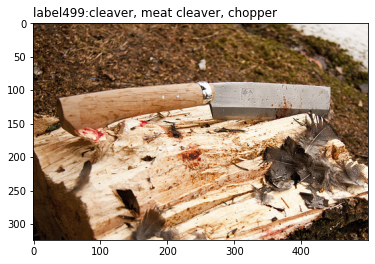

In [169]:
# gmlpが正解でefficientnetが不正解のリストから画像を確認する
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if j < gmlp_correct_but_efficient_incorrect_num:
    image_num = gmlp_correct_but_efficient_incorrect_list[j]
    print("---------------------------------------------------------------")
    image_file_name = f"ILSVRC2012_val_{str(image_num).zfill(8)}.JPEG"
    real_label = real_label_dict[image_file_name]
    print(f"{image_file_name}")
    print(f"real label:{real_label}")
    
    gmlp_predict_label_name = wordnet_to_labels_dict[int(gmlp_predict_label_dict[image_file_name][0])]
    gmlp_predict_label_ja = translation_en_to_ja(gmlp_predict_label_name)
    print(f"gmlp(correct):{gmlp_predict_label_name}({gmlp_predict_label_ja})")
    print(f"gmlp_top5_label:{gmlp_predict_label_dict[image_file_name]}")
    
    efficientnet_predict_label_name = wordnet_to_labels_dict[int(efficientnet_predict_label_dict[image_file_name][0])]
    efficientnet_predict_label_ja = translation_en_to_ja(efficientnet_predict_label_name)
    print(f"efficientnet(incorrect):{efficientnet_predict_label_name}({efficientnet_predict_label_ja})")
    print(f"efficientent_top5_label:{efficientnet_predict_label_dict[image_file_name]}")
    
    plt.imshow(mpimg.imread(f"../imagenet/validation/{image_file_name}"),cmap="gray")
    plt.title(f"label{real_label[0]}:{wordnet_to_labels_dict[int(real_label[0])]}", loc='left', y=1)
    
    j += 1

In [178]:
list = ['596', '677', '113', '301', '502']
for l in list:
    num = int(l)
    label_name = wordnet_to_labels_dict[num]
    print(l)
    print(label_name)
    print(translation_en_to_ja(label_name))
    print("\n")

596
hatchet
ハチェット


677
nail
爪


113
snail
カタツムリ


301
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
てんとう板、テンズリオ、てんとう虫、てんとう虫


502
clog, geta, patten, sabot
geta、patten、sabot




In [173]:
k = 0
gmlp_incorrect_but_efficient_correct_num = len(gmlp_incorrect_but_efficient_correct_list)

---------------------------------------------------------------
ILSVRC2012_val_00000589.JPEG
real label:['740']
gmlp(incorrect):bow(弓)
gmlp_top5_label:['456', '558', '902', '796', '764']
efficientnet(correct):power drill(パワードリル)
efficientent_top5_label:['740', '758', '898', '665', '763']


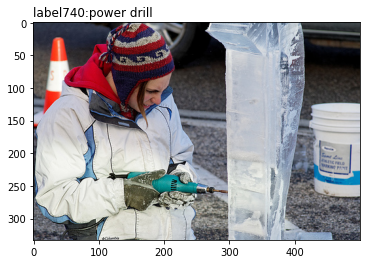

In [192]:
# gmlpが不正解でefficientnetが正解のリストから画像を確認する
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if k < gmlp_incorrect_but_efficient_correct_num:
    image_num = gmlp_incorrect_but_efficient_correct_list[k]
    image_file_name = f"ILSVRC2012_val_{str(image_num).zfill(8)}.JPEG"
    real_label = real_label_dict[image_file_name]
    print("---------------------------------------------------------------")
    print(f"{image_file_name}")
    print(f"real label:{real_label}")
    gmlp_predict_label_name = wordnet_to_labels_dict[int(gmlp_predict_label_dict[image_file_name][0])]
    gmlp_predict_label_ja = translation_en_to_ja(gmlp_predict_label_name)
    print(f"gmlp(incorrect):{gmlp_predict_label_name}({gmlp_predict_label_ja})")
    print(f"gmlp_top5_label:{gmlp_predict_label_dict[image_file_name]}")
    efficientnet_predict_label_name = wordnet_to_labels_dict[int(efficientnet_predict_label_dict[image_file_name][0])]
    efficientnet_predict_label_ja = translation_en_to_ja(efficientnet_predict_label_name)
    print(f"efficientnet(correct):{efficientnet_predict_label_name}({efficientnet_predict_label_ja})")
    print(f"efficientent_top5_label:{efficientnet_predict_label_dict[image_file_name]}")
    
    plt.imshow(mpimg.imread(f"../imagenet/validation/{image_file_name}"),cmap="gray")
    plt.title(f"label{real_label[0]}:{wordnet_to_labels_dict[int(real_label[0])]}", loc='left', y=1)
    
    k += 1

In [193]:
list = ['456', '558', '902', '796', '764']
for l in list:
    num = int(l)
    label_name = wordnet_to_labels_dict[num]
    print(l)
    print(label_name)
    print(translation_en_to_ja(label_name))
    print("\n")

456
bow
弓


558
flute, transverse flute
フルート、横フルート


902
whistle
ホイッスル


796
ski mask
目出し帽


764
rifle
ライフル


